# House Price Prediction :-

## Business Case :-

* Real estate is one of the most valuable sectors in any economy, and buying or selling a house is often one of the biggest financial decisions an individual makes. However, estimating the accurate market value of a property can be complex and subjective due to multiple influencing factors such as location, size, construction quality, amenities, and local market conditions.
* To address this challenge, this project aims to develop a data-driven machine learning model that can predict the sale price of a house based on its features, ensuring transparency, accuracy, and trust in property transactions.

## Data Understanding
* It contains 1,460 entries and 81 features, including the target variable SalePrice, which represents the final price of the house. This rich dataset includes a mix of:
* Numerical features (e.g., LotArea, GrLivArea, GarageArea)
* Categorical features (e.g., Neighborhood, BldgType, SaleCondition)

# Import Liabrary :

In [1]:
# Importing required libraries for data manipulation, visualization, and warning suppression.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading a CSV file named "data.csv" into a pandas DataFrame
df = pd.read_csv("data.csv")

# Configuring pandas to display all columns in the output.
pd.set_option('display.max_columns', None)    #expand the all columns

# Displaying the contents of the DataFrame to get an initial look at the data
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

# Basic Check :

In [3]:
# Getting concise summary of the dataset including column data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Drop columns that are either identifiers or contain a large amount of missing data
df = df.drop(
    ["Id",           # Unique identifier, not useful for modeling
     "Alley",        # Too many missing values (~93.7% missing)
     "MasVnrType",   # High missing rate (~59.7%), possibly redundant
     "FireplaceQu",  # Many missing values, may indicate no fireplace
     "PoolQC",       # Only 7 non-null entries, likely not useful
     "Fence",        # Mostly missing, low predictive value
     "MiscFeature"   # Rarely present, minimal impact on model
    ],axis=1           # axis=1 means we are dropping columns (not rows)
)

In [5]:
# Previewing the dataset again after dropping some columns.
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
# Displaying the column names of the dataset.
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [7]:
# Display summary statistics for all numeric columns in the DataFrame
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Display summary statistics for all columns with object (categorical) data types
df.describe(include='O')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


# Exploratory Data Analysis :-

## Definition:
* Exploratory Data Analysis (EDA) is a process for analyzing and summarizing datasets to uncover patterns, trends, and relationships. It uses descriptive statistics and visualizations, such as charts and graphs, to identify key characteristics and detect outliers.

* There are three type of EDA :-
 - 1.Univariate Analysis.
 - 2.Biavariate Analysis.
 - 3.Multivariate Analysis.

### 1. Univeriant Analysis:-

* Univariate analysis involves the examination of a single variable to find patterns in the data. It focuses on one variable at a time, to understand its distribution, central tendency (mean, median, mode) and variation (range, variance, standard deviation) can also be calculated.

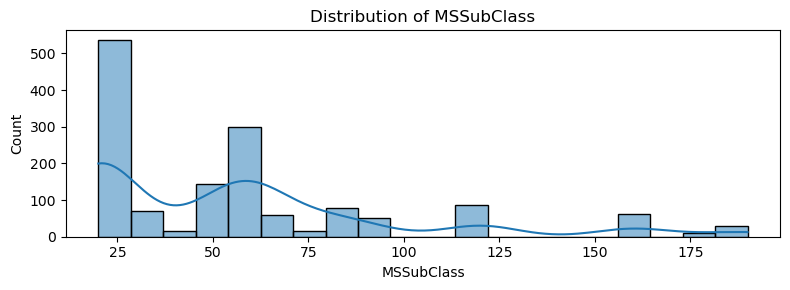

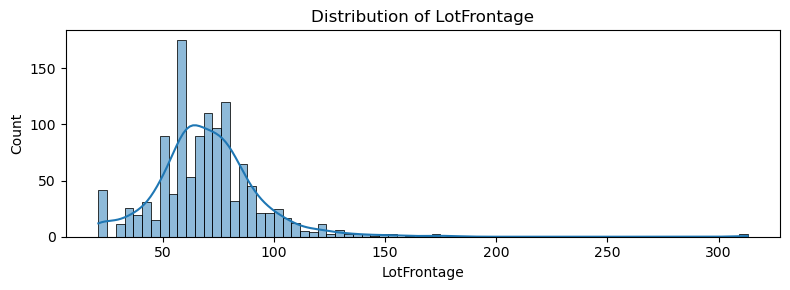

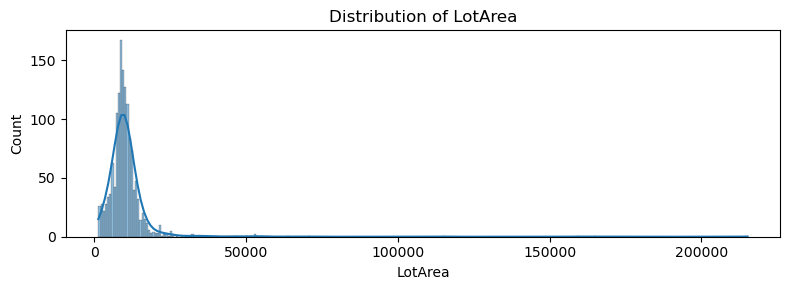

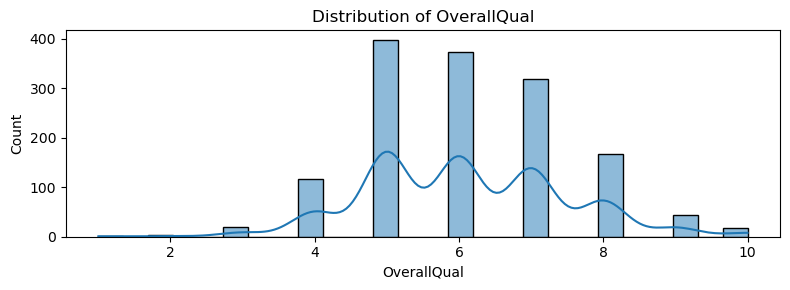

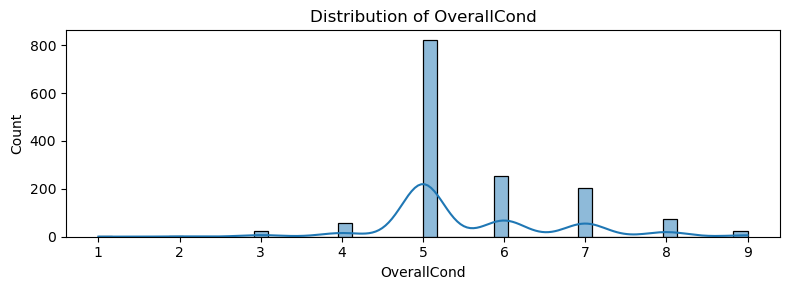

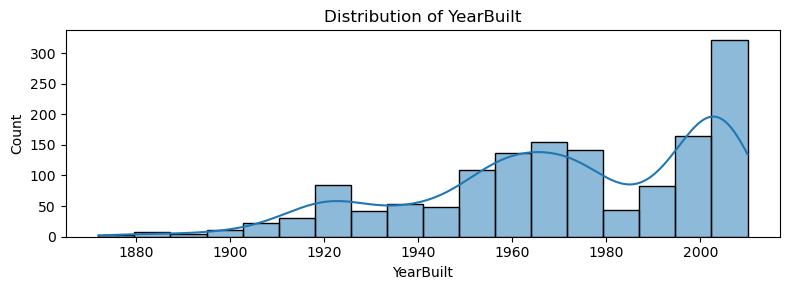

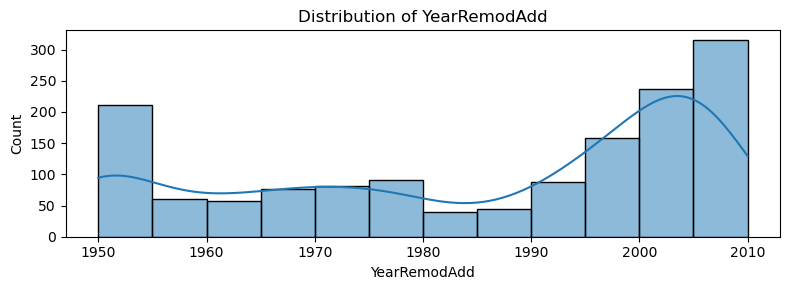

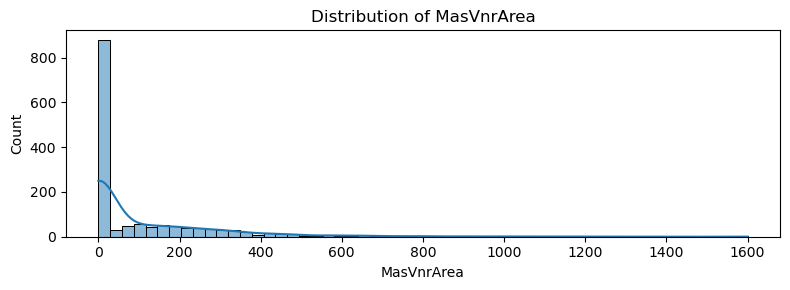

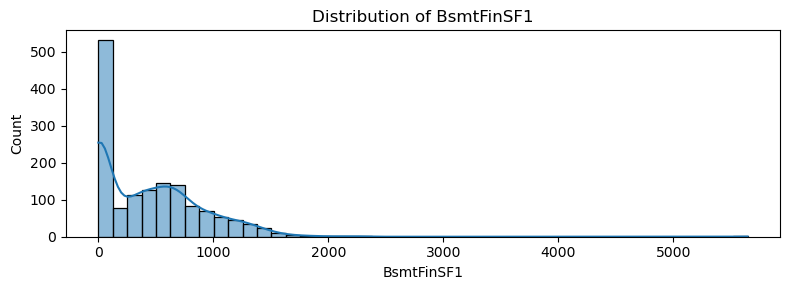

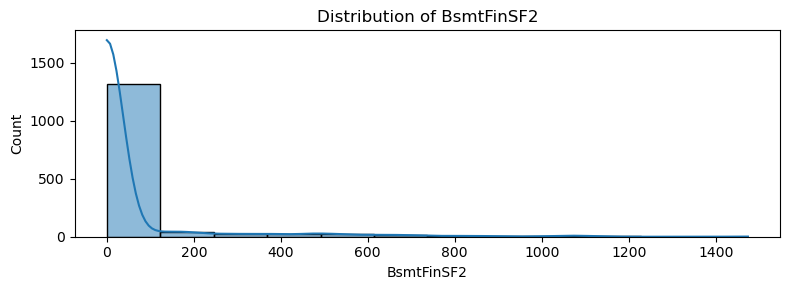

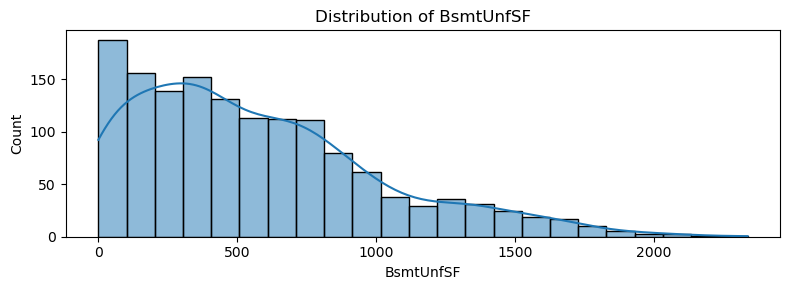

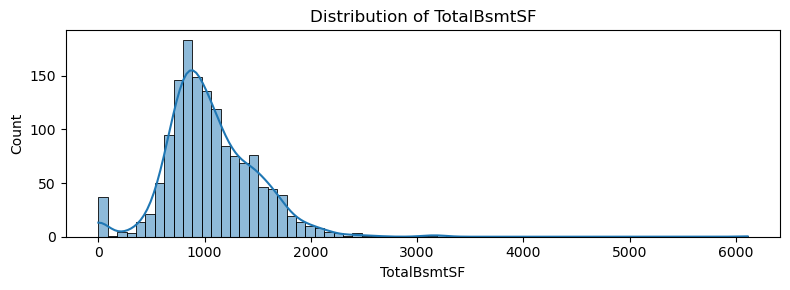

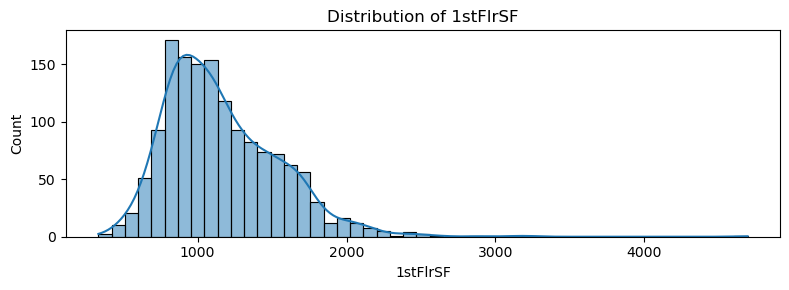

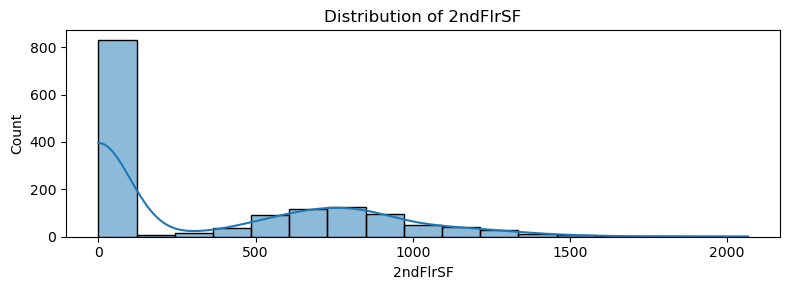

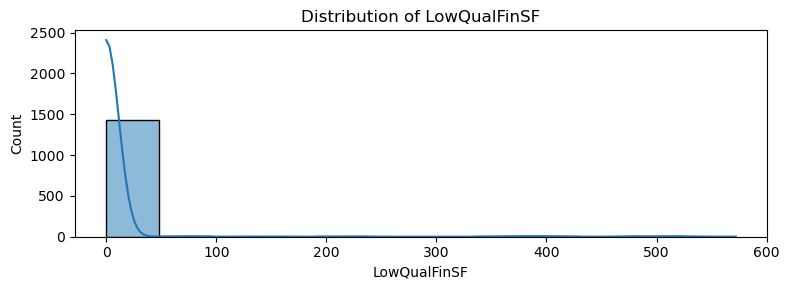

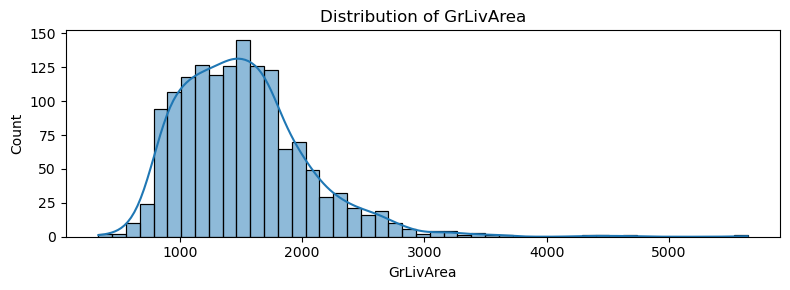

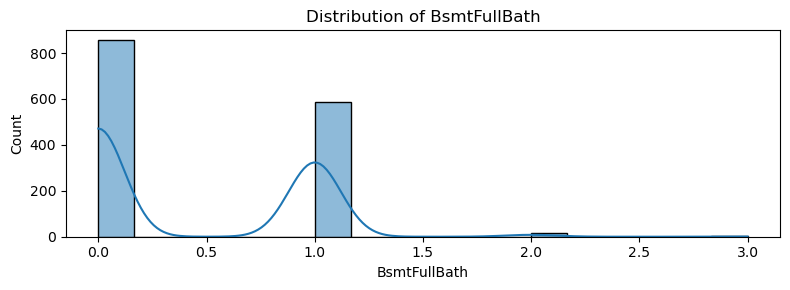

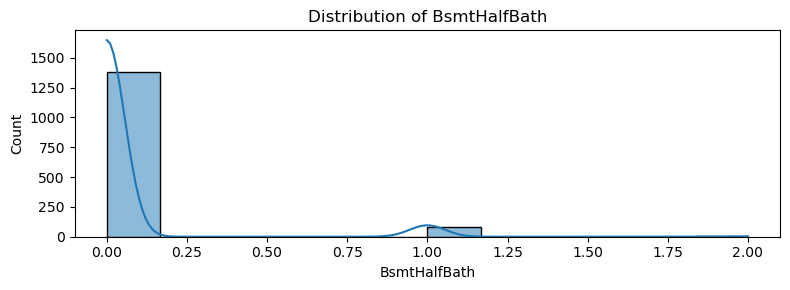

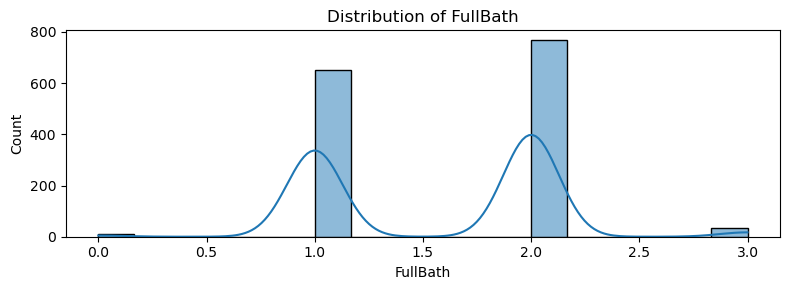

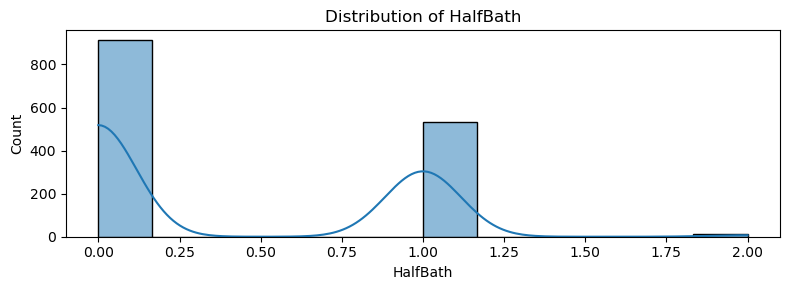

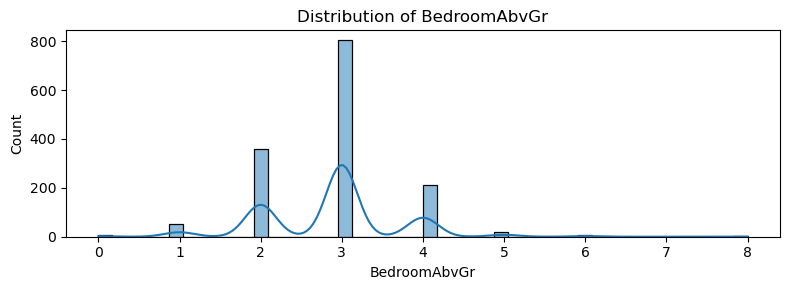

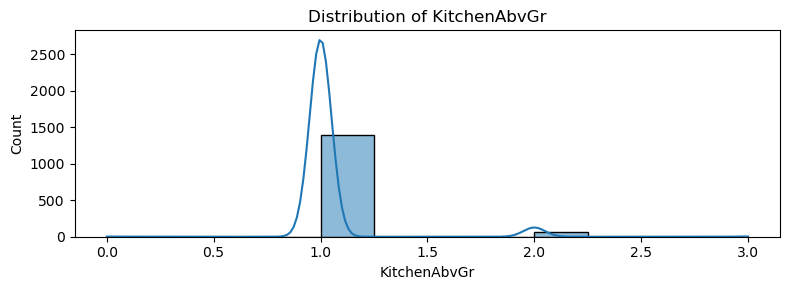

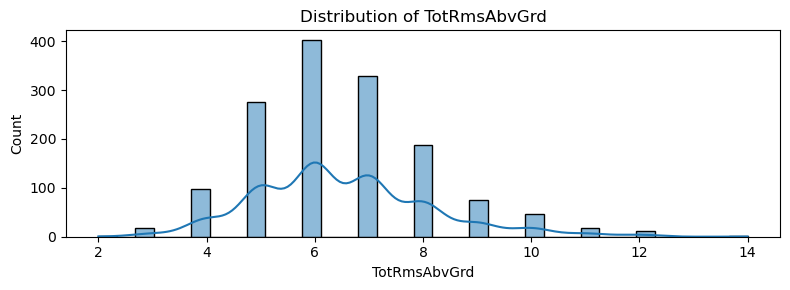

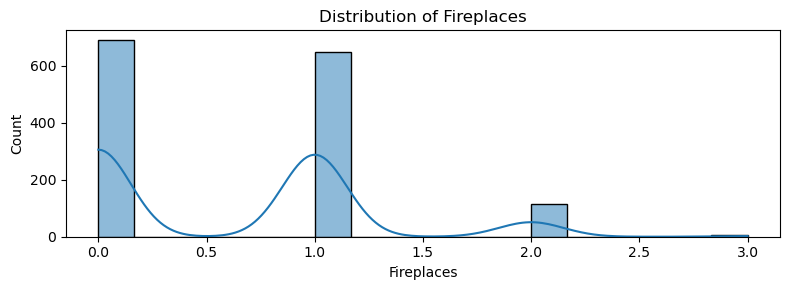

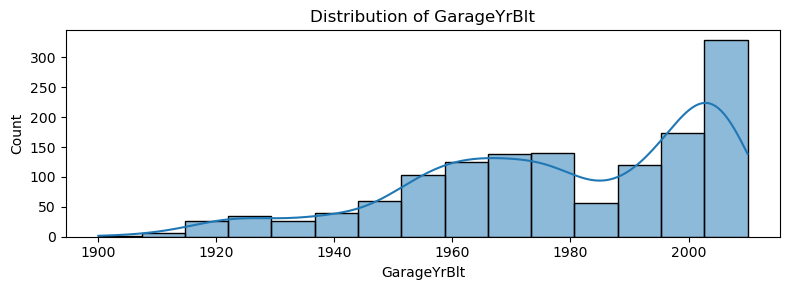

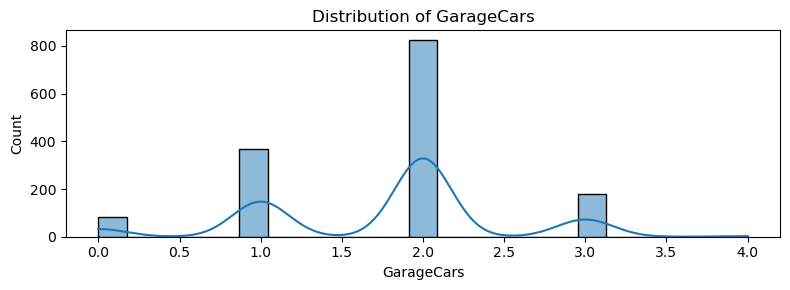

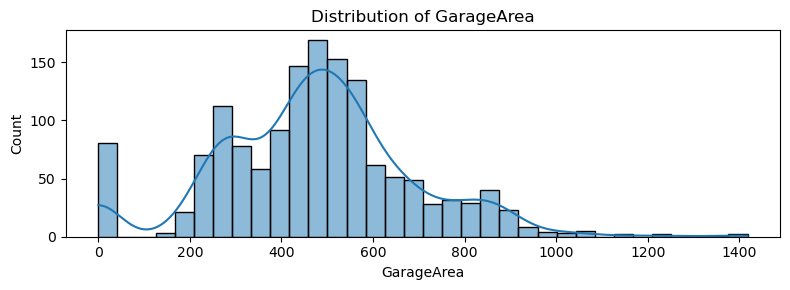

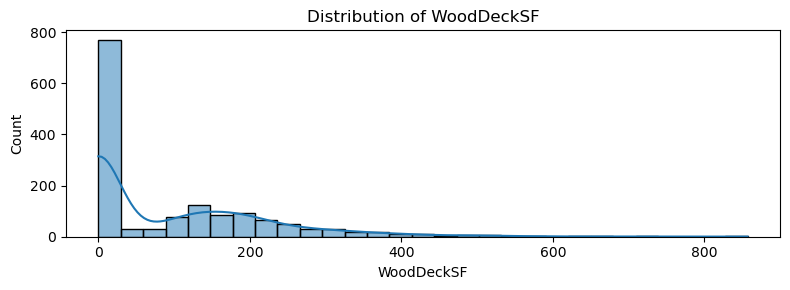

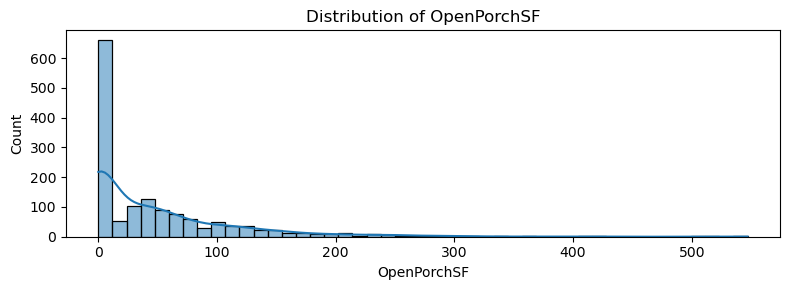

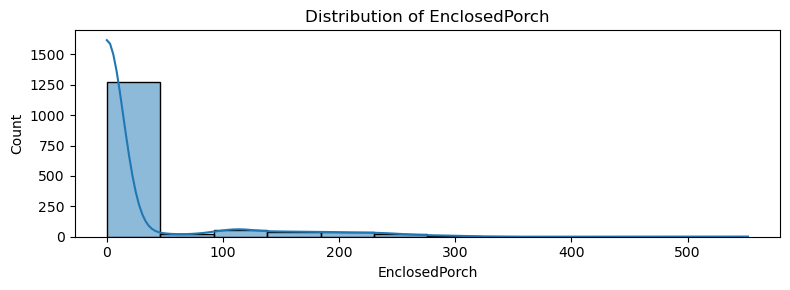

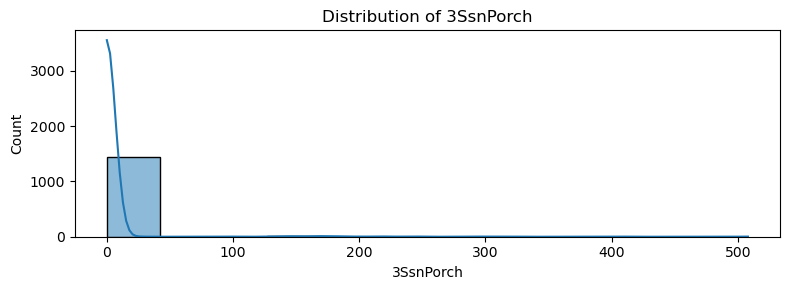

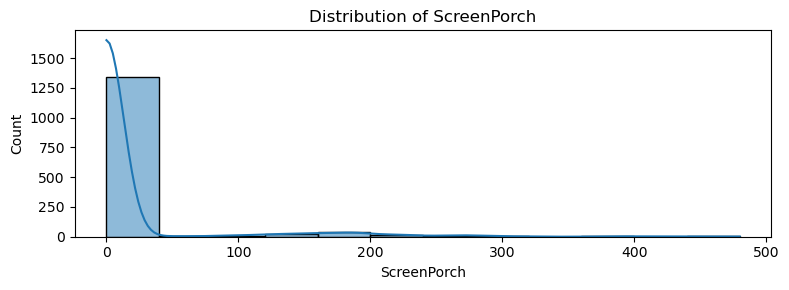

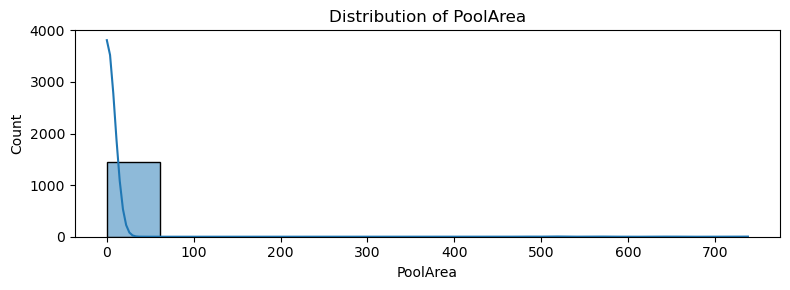

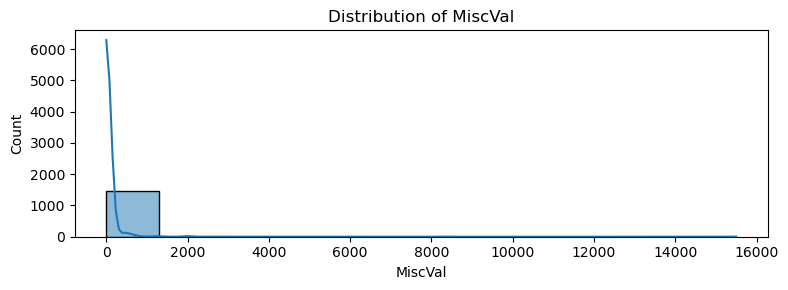

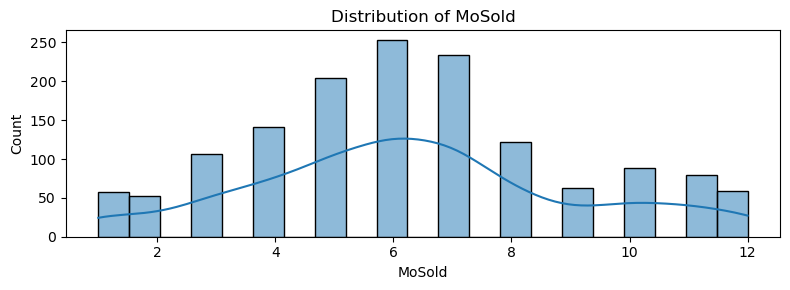

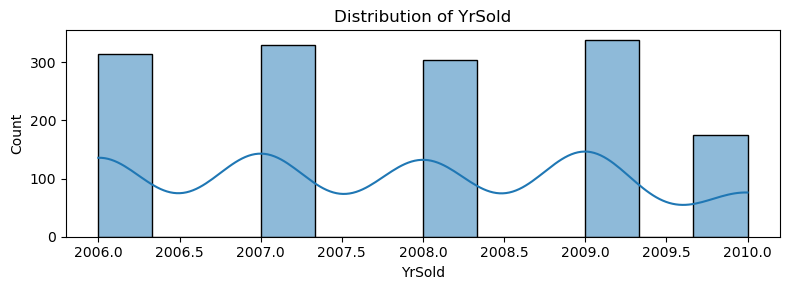

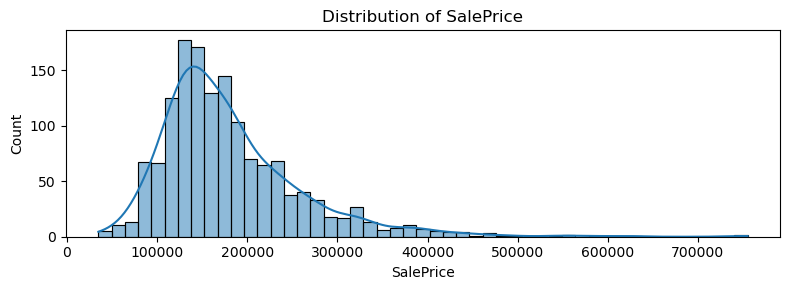

In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

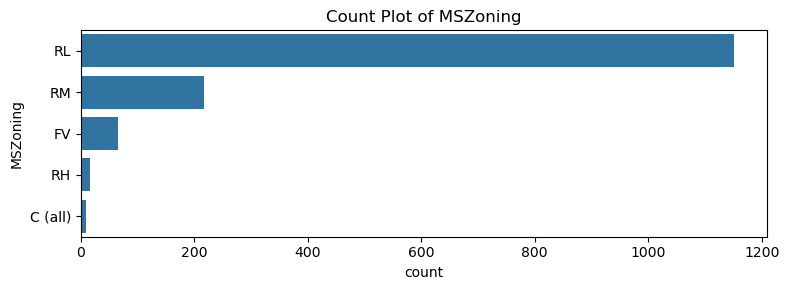

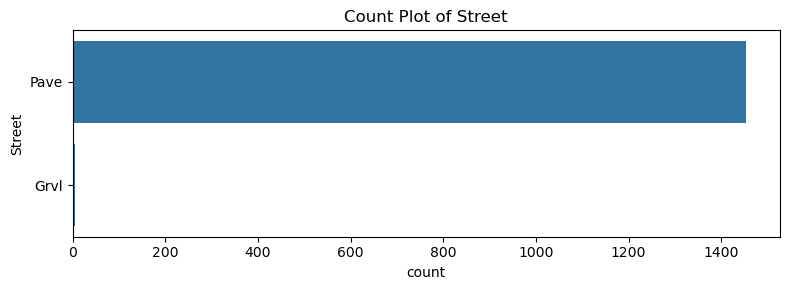

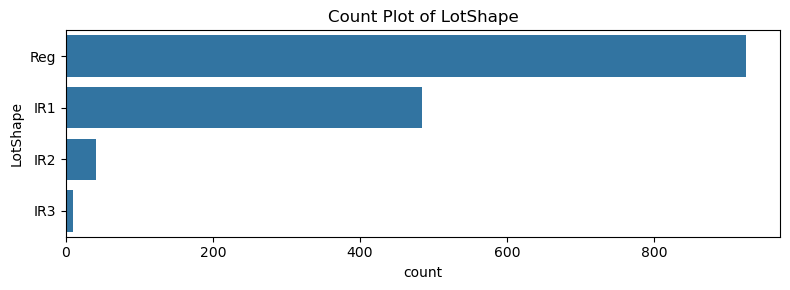

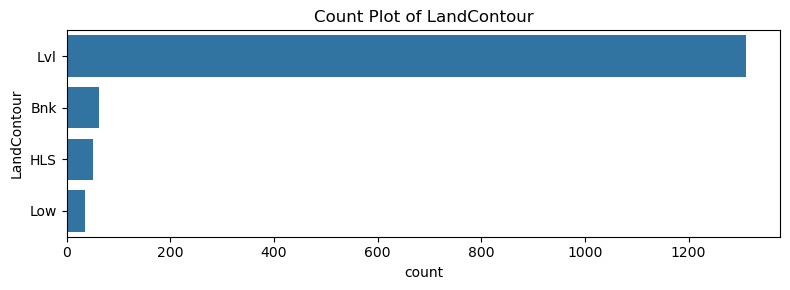

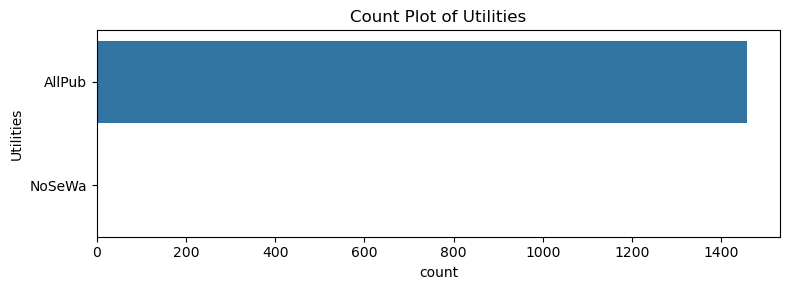

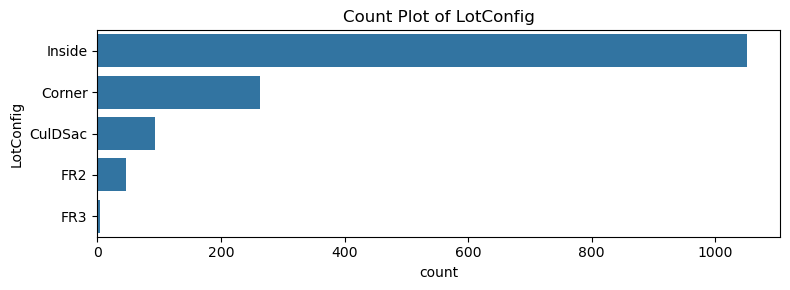

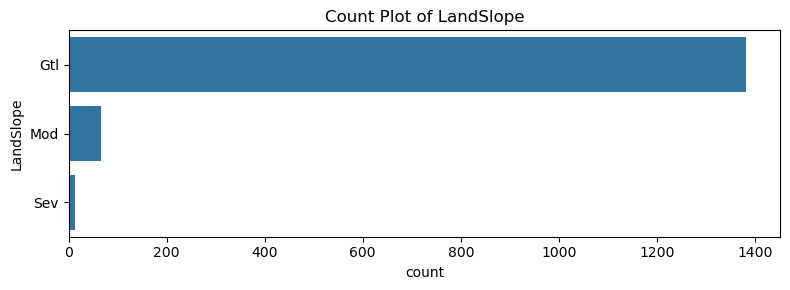

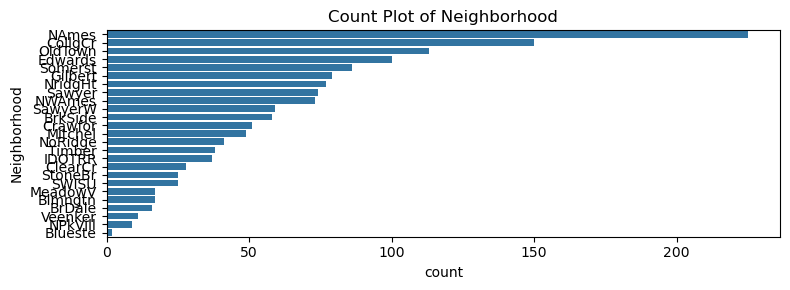

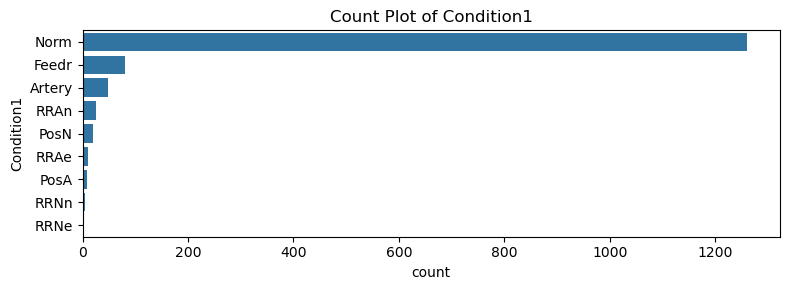

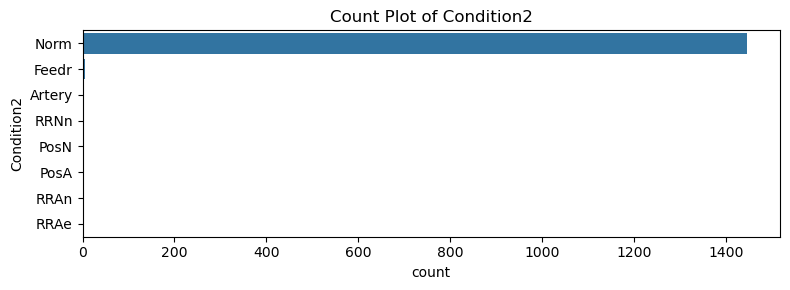

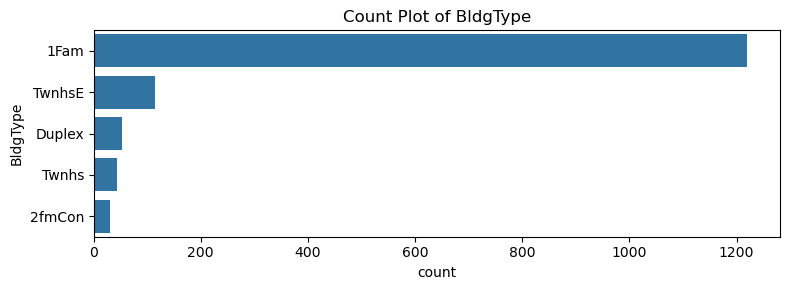

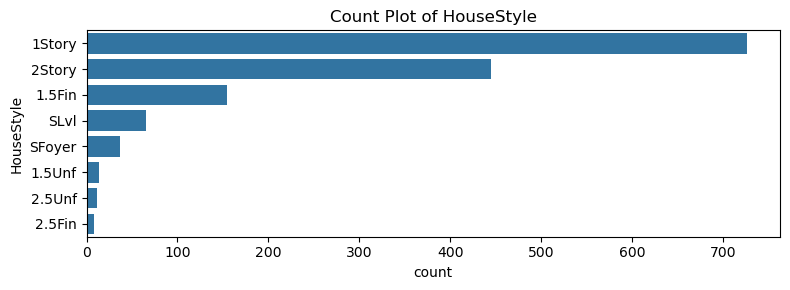

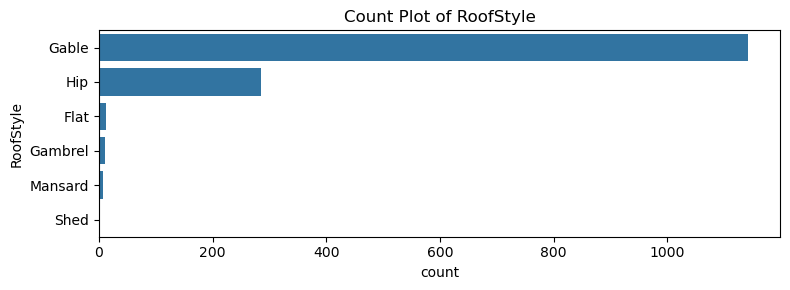

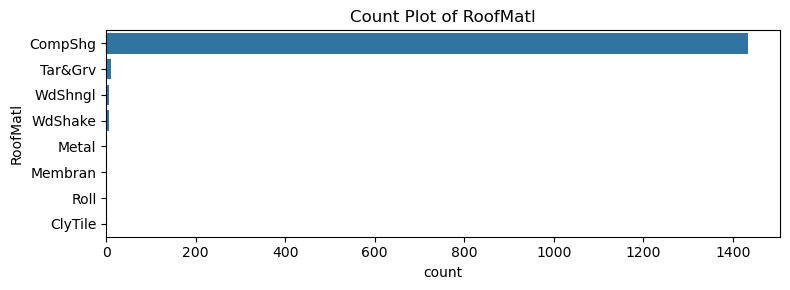

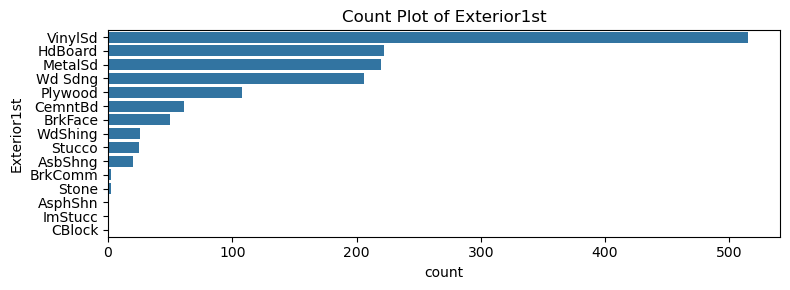

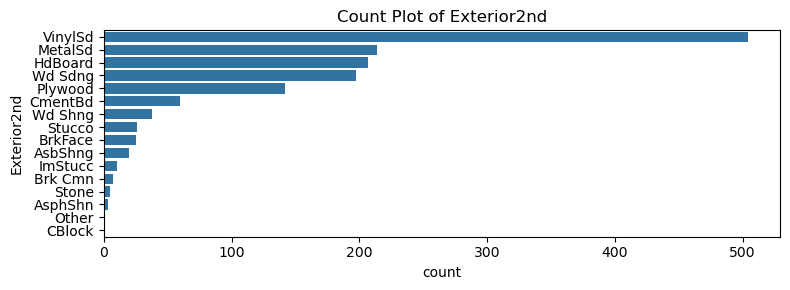

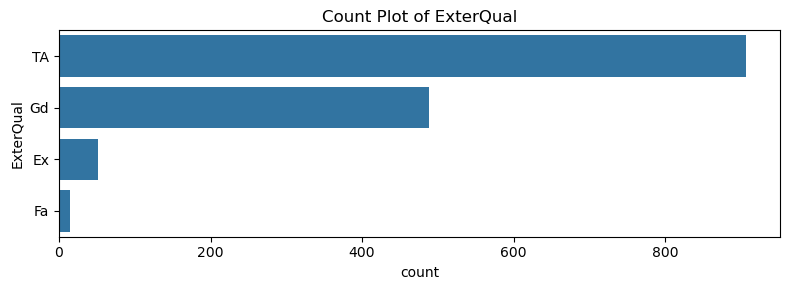

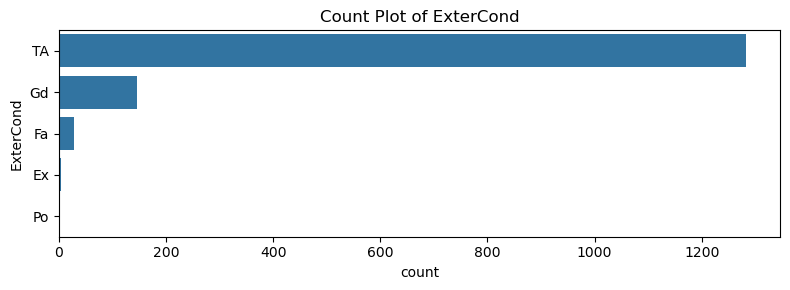

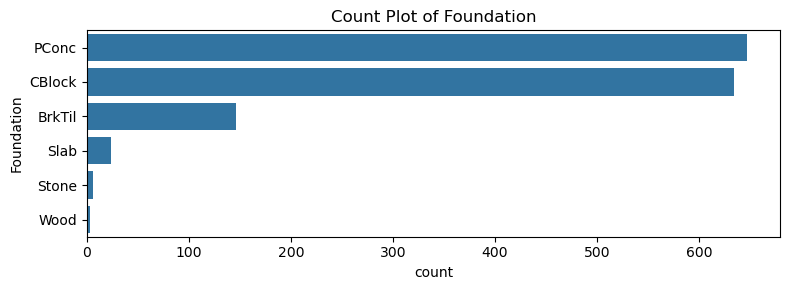

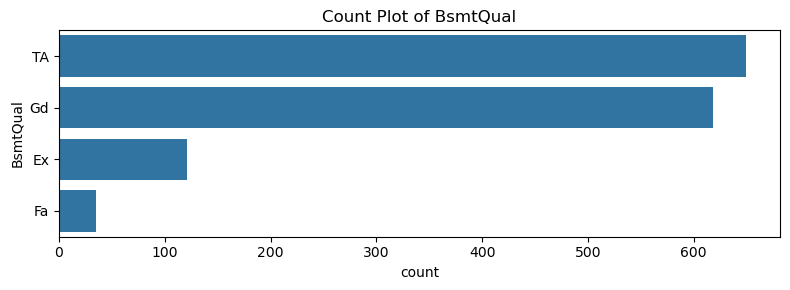

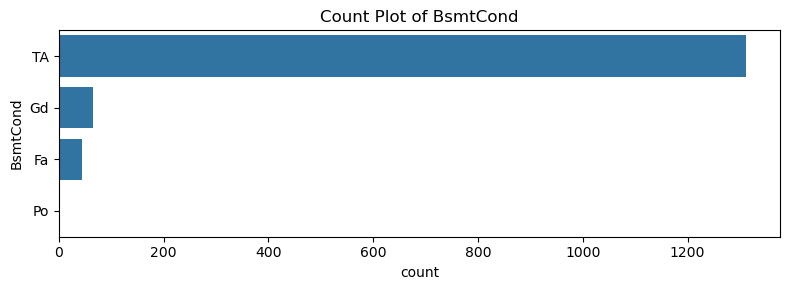

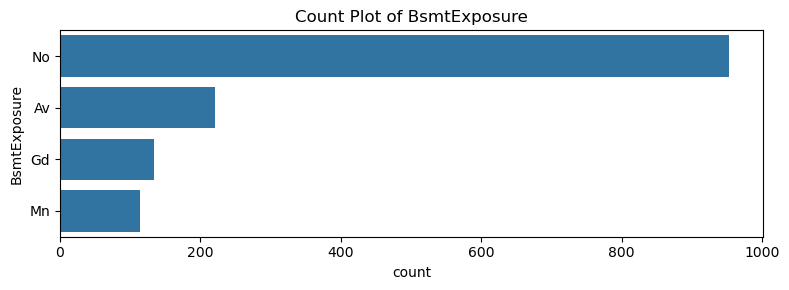

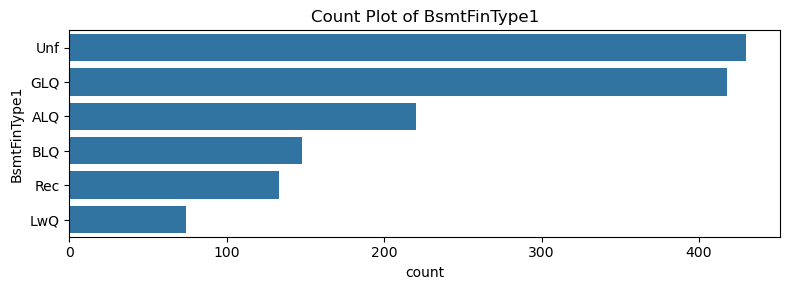

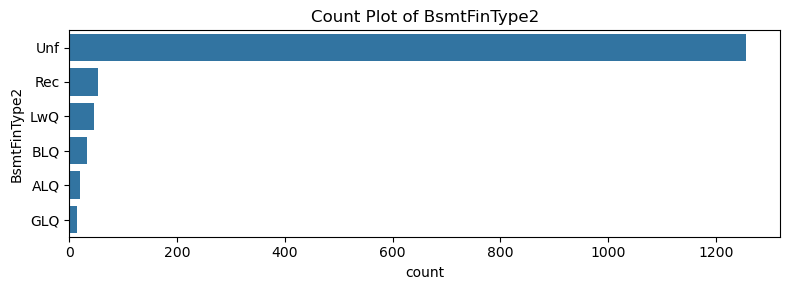

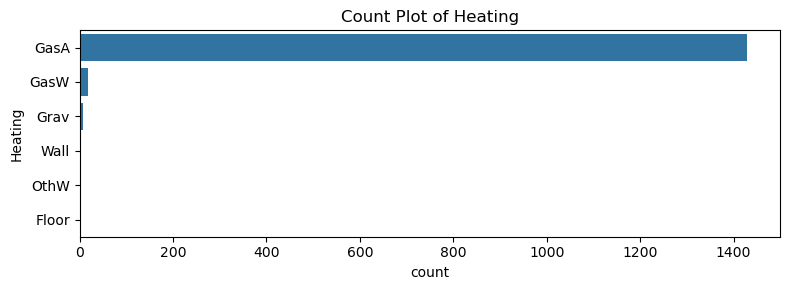

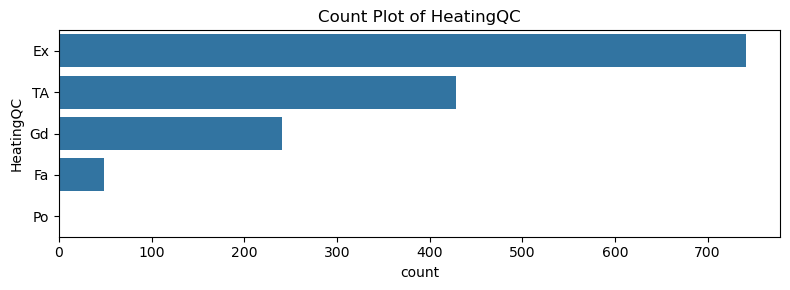

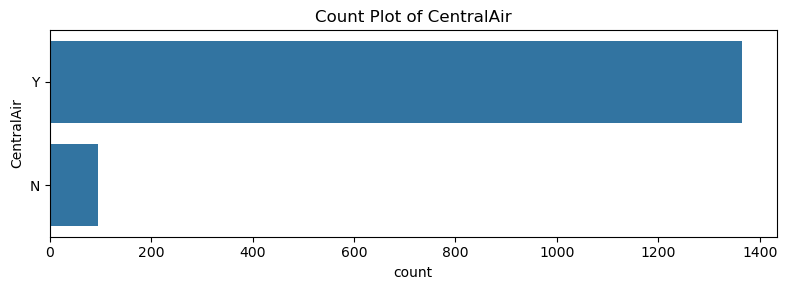

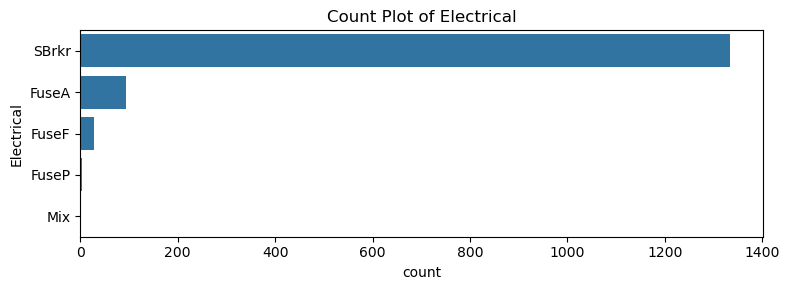

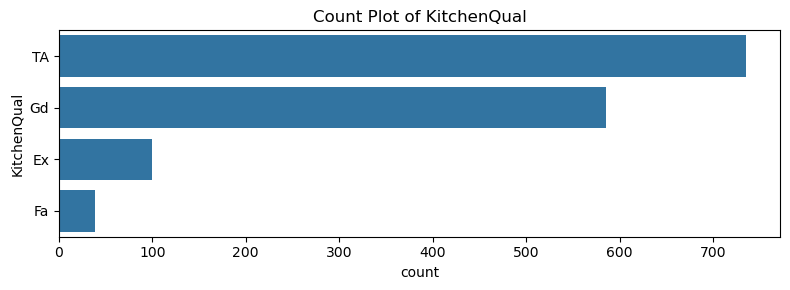

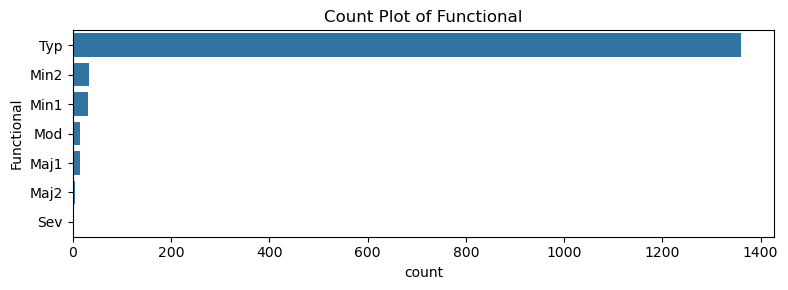

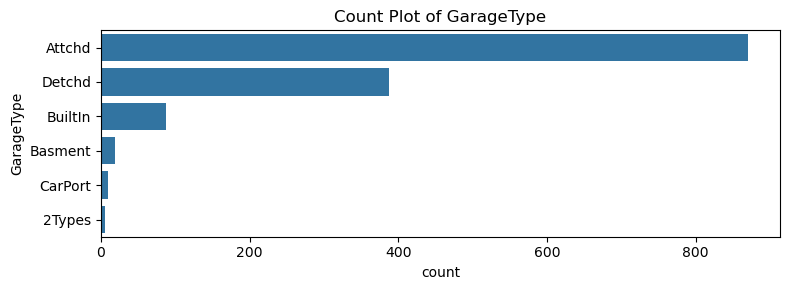

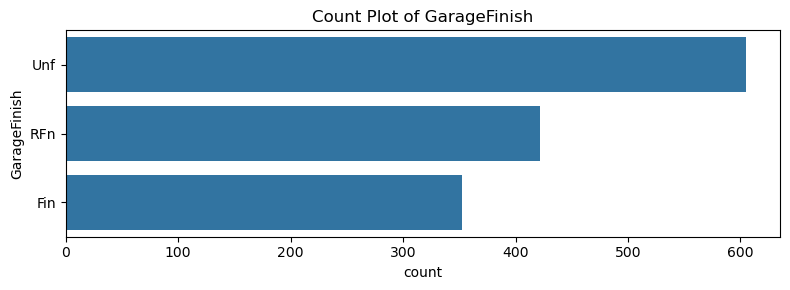

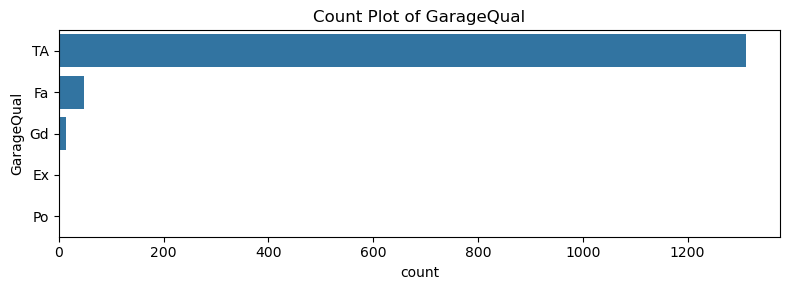

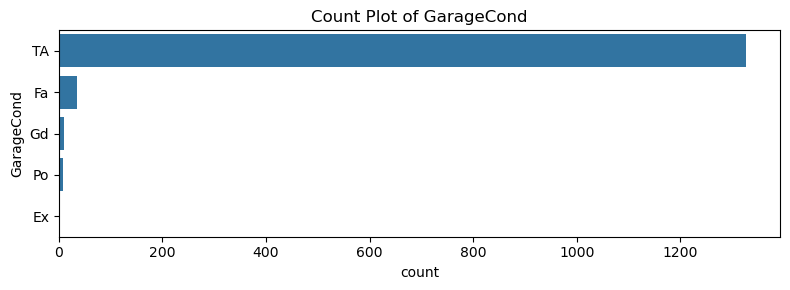

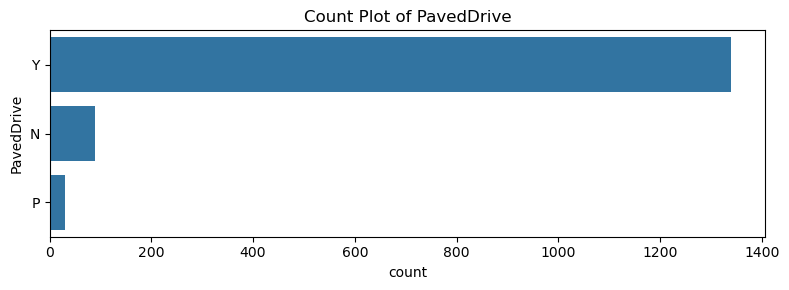

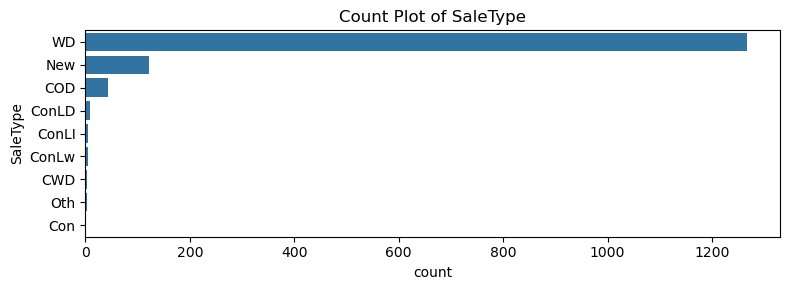

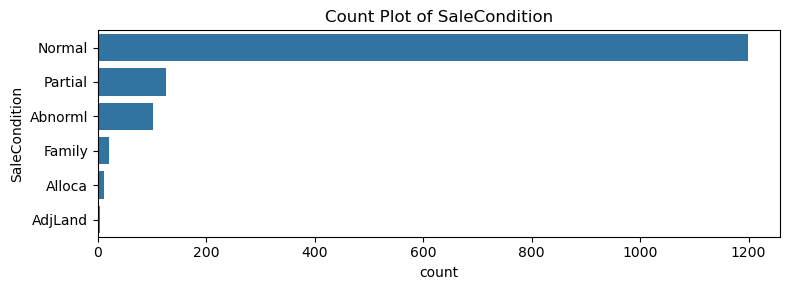

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.tight_layout()
    plt.show()

### 2. Biavariate Analysis :

* Bivariate analysis is for understanding how two variables influence each other, which can help decision-making and in further analysis.

In [11]:
categorical_col = df.select_dtypes(include='object').columns.tolist()

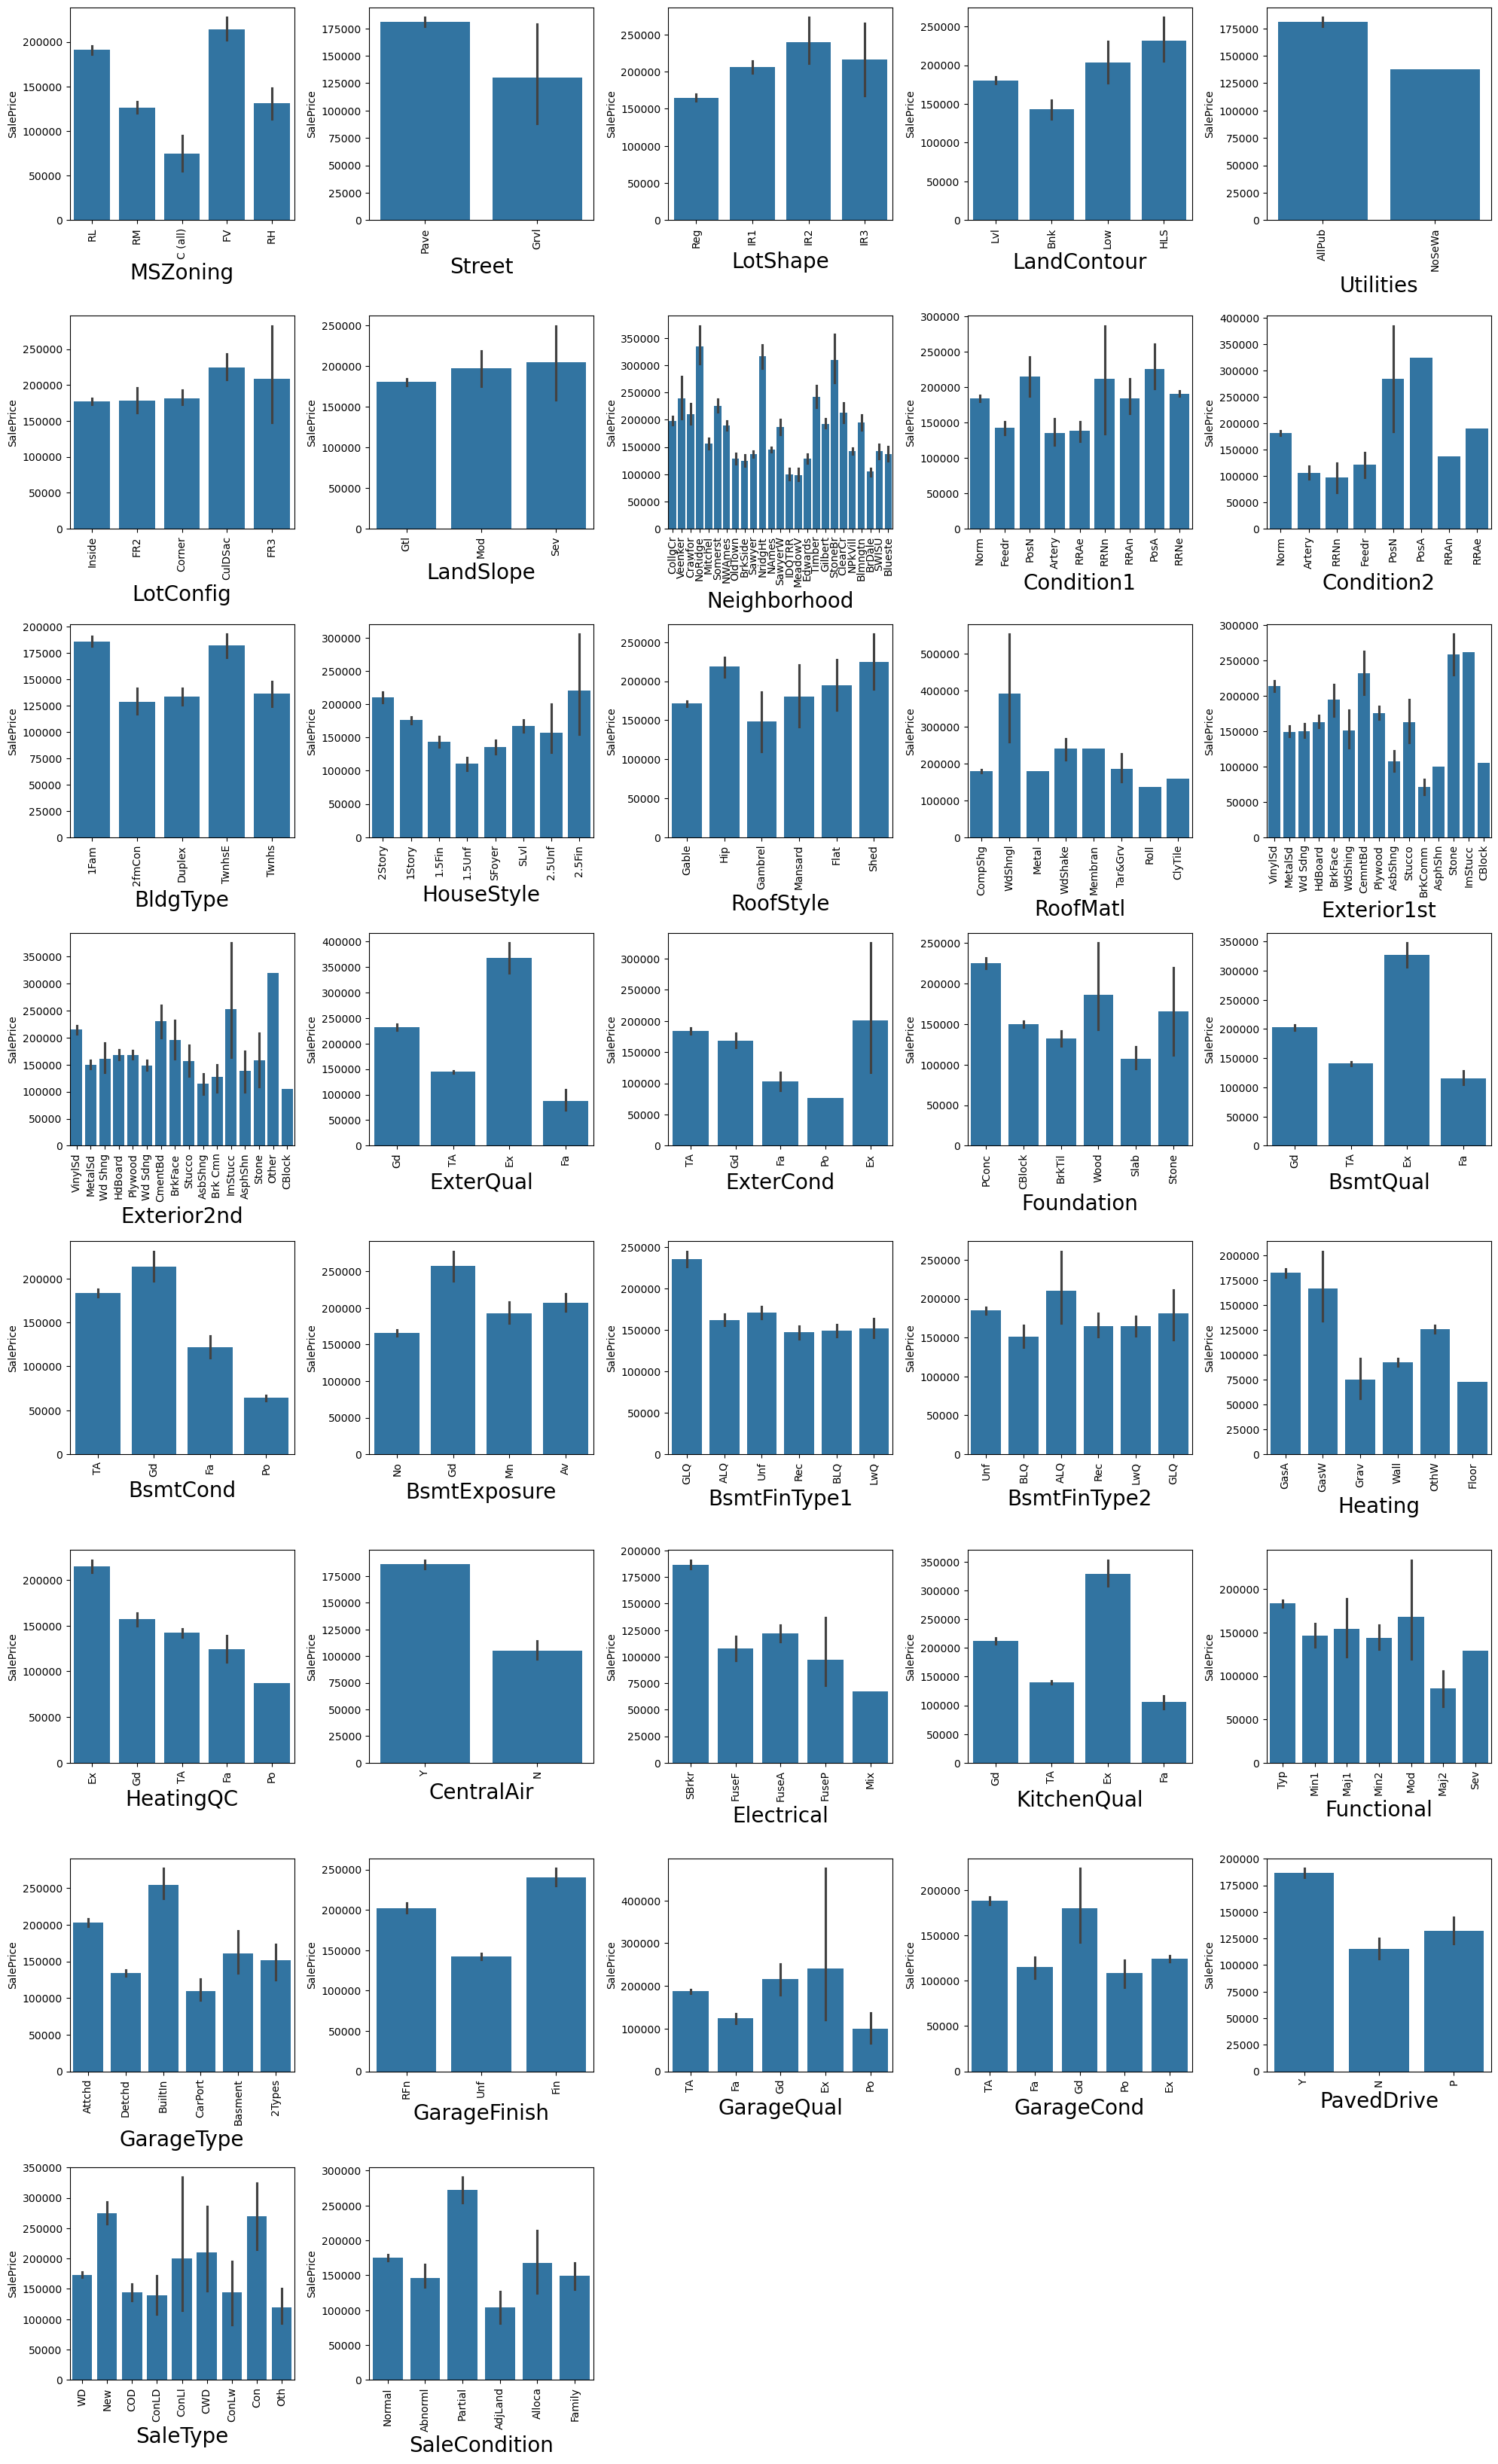

In [12]:
plt.figure(figsize=(20,40)) # univerient visualization
plt_num=1
for column in categorical_col:
    if plt_num <= 43:
        plt.subplot(10,5,plt_num)
        sns.barplot(x = df[column],y = df.SalePrice)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation = 90)# assighn the xlabel value
    plt_num+=1
plt.tight_layout()

# Feature Engineering :-

### Definition:
* Feature engineering is the process of creating, modifying, or selecting features. It involve removing outliers, transforming them and also eliminating features that do not contribute meaningful information to the model, Applying transformations to make features more suitable for modeling, and retain the most impactful features, ensuring the model focuses on the most informative inputs.

### 1. Data Preprocessing :

* Data preprocessing is the process of cleaning, transforming, and organizing raw data into a suitable format for analysis or machine learning. It involves several key steps like data cleaning ,data transformation , change in any data type also for dimensionality reduction.

In [18]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [19]:
# Impute with mode for categorical columns
cat_mode_cols = ['Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual']

In [20]:
for col in cat_mode_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [21]:
# Impute with median for numerical columns
num_median_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [22]:
for col in num_median_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [23]:
#Final Check
# Count missing values in each column
# Summing up null values in each column to handle missing data effectively
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
for col in cat_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [26]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,0,4,2010,8,4,142125


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [28]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

### 2. Feature Selection :

In [30]:
df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.356718,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,0.023573,-0.017161,-0.003254,0.058126,-0.041065,-0.013652,-0.064221,0.016599,-0.069836,0.041195,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.051945,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,0.090719,0.081396,0.012301,-0.040110,-0.098672,0.007630,0.002927,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.105961,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,-0.062830,0.200536,-0.096041,-0.235174,0.128245,-0.010528,0.037209,0.024688,-0.049128,-0.031718,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070818,-0.055614,-0.051481,0.011520,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,0.116007,-0.263772,0.167501,-0.157042,-0.189250,-0.150802,-0.083272,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.356718,-0.105961,1.000000,0.304522,-0.037349,-0.138877,-0.076080,-0.001027,-0.177821,0.065603,0.084901,-0.009341,0.002599,-0.408013,0.030567,0.234812,-0.053281,0.116685,0.083348,0.153999,0.081277,0.075455,0.099515,0.178469,-0.184120,0.048300,0.098418,-0.169603,0.050604,-0.123629,-0.023263,0.214367,-0.025981,0.042463,0.124098,0.363472,-0.020325,-0.081081,0.067350,0.059572,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,-0.190232,0.320518,0.030114,0.233221,-0.216403,0.062996,-0.211125,0.269539,0.323511,0.049935,0.042740,0.088121,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,-0.031412,0.058857,0.334771
LotArea,-0.139781,-0.034452,0.304522,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.105806,-0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,-0.003930,0.103321,-0.057275,0.015160,-0.011081,-0.065150,0.012366,-0.141043,-0.061880,0.214103,-0.068954,0.111170,-0.002618,0.260833,0.028158,0.004212,0.049755,0.043856,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,-0.057018,0.190015,-0.022317,0.271364,-0.116799,-0.025865,-0.116326,0.154871,0.180403,0.017551,0.028106,0.015134,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.037349,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,-0.011561,-0.071657,0.002039,-0.018243,0.023704,0.058823,0.042848,0.021137,0.065465,-0.019732,0.008081,0.002505,0.006166,0.017108,0.049976,0.005874,0.035277,-0.028731,-0.018054,0.072488,-0.013182,-0.015643,0.061285,-0.038487,0.035229,0.005068,0.007904,-0.0539

# Model Creation :-

In [31]:
# X =  new_df[top_features]
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [32]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,2500,5,2010,8,4
1458,20,3,68.0,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,0,4,2010,8,4


In [33]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [35]:
X_scale

array([[ 0.07337496, -0.04553194, -0.22087509, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.46031974, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194, -0.08463612, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.30985939, -0.04553194, -0.1754621 , ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194, -0.08463612, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.23325479, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

# Model Selection :-

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,3,70.0,8400,1,3,3,0,4,0,12,2,2,0,2,5,6,1957,1957,1,1,8,8,0.0,3,2,1,3,3,3,4,922,5,0,392,1314,1,4,1,4,1314,0,0,1314,1,0,1,0,3,1,3,5,6,0,1,1957.0,1,1,294,4,4,2,250,0,0,0,0,0,0,6,2010,8,4
1066,60,3,59.0,7837,1,0,3,0,4,0,8,2,2,0,5,6,7,1993,1994,1,1,12,13,0.0,2,4,2,2,3,3,5,0,5,0,799,799,1,2,1,4,799,772,0,1571,0,0,2,1,3,1,3,7,6,1,1,1993.0,1,2,380,4,4,2,0,40,0,0,0,0,0,5,2009,8,4
638,30,3,67.0,8777,1,3,3,0,4,0,7,1,2,0,2,5,7,1910,1950,1,1,8,14,0.0,3,4,1,1,3,3,5,0,5,0,796,796,1,2,1,0,796,0,0,796,0,0,1,0,2,1,3,4,6,0,1,1980.0,2,0,0,4,4,1,328,0,164,0,0,0,0,5,2008,8,4
799,50,3,60.0,7200,1,3,3,0,0,0,18,1,2,0,0,5,7,1937,1950,1,1,13,14,252.0,3,4,0,2,3,3,0,569,5,0,162,731,1,0,1,4,981,787,0,1768,1,0,1,1,3,1,2,7,6,2,5,1939.0,2,1,240,4,4,2,0,0,264,0,0,0,0,6,2007,8,4
380,50,3,50.0,5000,1,3,3,0,4,0,18,2,2,0,0,5,6,1924,1950,1,1,3,14,0.0,3,4,0,3,3,3,3,218,5,0,808,1026,1,4,1,4,1026,665,0,1691,0,0,2,0,3,1,2,6,6,1,5,1924.0,2,1,308,4,4,2,0,0,242,0,0,0,0,5,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,3,78.0,9317,1,0,3,0,4,0,5,2,2,0,2,6,5,2006,2006,1,1,12,13,0.0,2,4,2,2,3,3,2,24,5,0,1290,1314,1,2,1,4,1314,0,0,1314,0,0,2,0,3,1,2,6,6,1,1,2006.0,1,2,440,4,4,2,0,22,0,0,0,0,0,3,2007,8,4
1130,50,3,65.0,7804,1,3,3,0,4,0,18,2,2,0,0,4,3,1928,1950,1,1,14,10,0.0,3,4,0,3,3,3,1,622,5,0,500,1122,1,4,1,4,1328,653,0,1981,1,0,2,0,4,1,2,7,3,2,5,1981.0,2,2,576,4,4,2,431,44,0,0,0,0,0,12,2009,8,4
1294,20,3,60.0,8172,1,3,3,0,4,0,7,2,2,0,2,5,7,1955,1990,3,1,14,10,0.0,3,4,1,3,3,3,4,167,5,0,697,864,1,4,1,4,864,0,0,864,1,0,1,0,2,1,3,5,6,0,5,1957.0,2,2,572,4,4,0,0,0,0,0,0,0,0,4,2006,8,4
860,50,3,55.0,7642,1,3,3,0,0,0,6,2,2,0,0,7,8,1918,1998,1,1,13,14,0.0,2,4,0,3,3,3,5,0,5,0,912,912,1,2,1,4,912,514,0,1426,0,0,1,1,3,1,2,7,6,1,5,1925.0,2,1,216,4,4,2,0,240,0,0,0,0,0,6,2007,8,4


In [38]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

## 1. LinearRegration :-

In [39]:
# Importing the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Creating an instance (object) of the LinearRegression model
LR = LinearRegression()

# Training (fitting) the Linear Regression model using the training data
# The model will learn the relationship between the features (x_train) and the target variable (y_train)
LR.fit(X_train, y_train)

LinearRegression()

In [40]:
# Making predictions on the training data using the trained Linear Regression model
# The model will use the learned coefficients to predict the target variable based on x_train features

y_predict = LR.predict(X_train)

In [41]:
# Making predictions on the testing data using the trained Linear Regression model
# The model will use the learned coefficients to predict the target variable based on x_test features

y_pred = LR.predict(X_test)

In [42]:
y_predict

array([129549.58089214, 185315.57801457, 100764.84656124, ...,
       121185.97613844, 166452.47761766, 205226.69968131])

### Evalution of Model :

In [43]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score

In [44]:
mean_squared_error(y_train,y_predict)

922631450.0005422

In [45]:
mean_squared_error(y_test,y_pred)

1185454619.4217465

In [46]:
root_mean_squared_error(y_train,y_predict)

30374.84897082687

In [47]:
root_mean_squared_error(y_test,y_pred)

34430.43158924596

In [48]:
r2_score(y_train,y_predict)

0.8453141659881424

In [49]:
r2_score(y_test,y_pred)

0.8454492563418006

In [50]:
mean_absolute_error(y_train,y_predict)

18635.305788488477

In [51]:
mean_absolute_error(y_test,y_pred)

21459.18270283008

## 2. DecisionTree :-

In [52]:
# Import the DecisionTreeClassifier from scikit-learn's tree module
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the DecisionTreeClassifier with default parameters
dt = DecisionTreeRegressor()

# Fit (train) the decision tree classifier using the training data
# x_train: feature variables, y_train: target variable
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
y_predict = dt.predict(X_train) #predicting the model

In [54]:
y_pred = dt.predict(X_test)  # predicting the model

In [55]:
mean_squared_error(y_train,y_predict)

0.0

In [56]:
mean_squared_error(y_test,y_pred)

1809870470.4965754

In [57]:
root_mean_squared_error(y_train,y_predict)

0.0

In [58]:
root_mean_squared_error(y_test,y_pred)

42542.572448038154

In [59]:
r2_score(y_train,y_predict)

1.0

In [60]:
r2_score(y_test,y_pred)

0.7640425685154407

In [61]:
mean_absolute_error(y_train,y_predict)

0.0

In [62]:
mean_absolute_error(y_test,y_pred)

28021.119863013697

## 3. RandomForestClassifier :-

In [63]:
from sklearn.ensemble import RandomForestRegressor   #importing randomforest
rfc = RandomForestRegressor()                     #object creation for random forest
rfc.fit(X_train,y_train)                             # training the data

RandomForestRegressor()

In [64]:
y_predict = rfc.predict(X_train)  # predicting the model

In [65]:
y_pred = rfc.predict(X_test)  # predicting the model

In [66]:
mean_squared_error(y_train,y_predict)

114941172.21525119

In [67]:
mean_squared_error(y_test,y_pred)

801907277.4281654

In [68]:
root_mean_squared_error(y_train,y_predict)

10721.062084292358

In [69]:
root_mean_squared_error(y_test,y_pred)

28317.967395774816

In [70]:
r2_score(y_train,y_predict)

0.9807292813545363

In [71]:
r2_score(y_test,y_pred)

0.8954533020151378

In [72]:
mean_absolute_error(y_train,y_predict)

6462.276164383562

In [73]:
mean_absolute_error(y_test,y_pred)

17453.55455479452

## 4. KNN :-

In [74]:
from sklearn.neighbors import KNeighborsRegressor     #importing the model library
knn = KNeighborsRegressor()                            # object creation
knn.fit(X_train, y_train)                              # fillting the data

KNeighborsRegressor()

In [75]:
y_predict = knn.predict(X_train)  # predicting the model

In [76]:
y_pred = knn.predict(X_test)  # predicting the model

In [77]:
mean_squared_error(y_train,y_predict)

1435953931.1474314

In [78]:
mean_squared_error(y_test,y_pred)

2273201899.734658

In [79]:
root_mean_squared_error(y_train,y_predict)

37893.98278285658

In [80]:
root_mean_squared_error(y_test,y_pred)

47678.1071324634

In [81]:
r2_score(y_train,y_predict)

0.7592519402606365

In [82]:
r2_score(y_test,y_pred)

0.703636867803007

In [83]:
mean_absolute_error(y_train,y_predict)

24279.854965753428

In [84]:
mean_absolute_error(y_test,y_pred)

28142.79794520548

## 5. XtremeGradientBoosting :-

In [85]:
# Import the XGBRegressor class from the xgboost library
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor model (used for regression tasks)
XGBoost = XGBRegressor()

# Train (fit) the XGBoost model using the training features (X_train) and target values (y_train)
XGBoost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
y_predict = XGBoost.predict(X_train)  # predicting the model

In [87]:
y_pred = XGBoost.predict(X_test)  # predicting the model

In [88]:
mean_squared_error(y_train,y_predict)

802262.1978407821

In [89]:
mean_squared_error(y_test,y_pred)

646200508.78992

In [90]:
root_mean_squared_error(y_train,y_predict)

895.6909053020368

In [91]:
root_mean_squared_error(y_test,y_pred)

25420.474204662667

In [92]:
r2_score(y_train,y_predict)

0.9998654723167419

In [93]:
r2_score(y_test,y_pred)

0.915753185749054

In [94]:
mean_absolute_error(y_train,y_predict)

613.494301155822

In [95]:
mean_absolute_error(y_test,y_pred)

16187.327442744006

In [96]:
models= pd.DataFrame({
    "Models" : ["LinearRegration","DecisionTree","RandomForestClassifier","KNN","XtremeGradientBoosting"],
    "training r2 score":[0.8453141659881424,1.0,0.9802951243163089,0.7592519402606365,0.9998654723167419],
    "testing r2 score":[0.8454492563418006,0.773044719494449,0.8939333820739425,0.703636867803007,0.915753185749054]
})

In [97]:
models

,Models,training r2 score,testing r2 score
0,LinearRegration,0.845314,0.845449
1,DecisionTree,1.000000,0.773045
2,RandomForestClassifier,0.980295,0.893933
3,KNN,0.759252,0.703637
4,XtremeGradientBoosting,0.999865,0.915753


## Model Comparision Report
* I have used total 5 Algorithm like LinearRegration,DecisionTree,RandomForestClassifier, KNN, XtremeGradientBoosting.
* XtremeGradientBoosting secures the top position with an R² score of 91.57%, indicating excellent predictive accuracy and performance.
* LinearRegration,DecisionTree,RandomForestClassifier,KNN have accuracy between 70.36% to 89.39%.

## Recommendations for Customers

To assist customers in choosing the best home, we apply data-driven insights to personalize recommendations based on their preferences.

###  Filter Homes By:

- ** Location**: Choose preferred neighborhoods or areas of interest.
- ** Price Range**: Set a maximum budget for the home purchase.
- ** Size / Amenities**:
  - Minimum square footage (e.g., at least 1200 sqft)
  - Minimum number of bedrooms
  - Features like garage, number of bathrooms, etc.

###  Recommend:

####  Budget-Friendly Areas
Identify neighborhoods where the **average sale price is low**, making them attractive to budget-conscious buyers.

####  Top-Value Properties
Highlight homes with a **low price per square foot**, indicating better value for money.

####  Trade-Off Insights
Analyze how **different neighborhoods offer varying space** (sqft) for the **same price**:
- Helps customers choose between location vs. size trade-offs.
- E.g., “You get more space in `X` for the same price as a smaller home in `Y`.”

These insights help optimize home buying decisions by aligning customer priorities with market data.

### Final Report
* I have implemented Five algorithms in analysis, which include LinearRegration,DecisionTree,RandomForestClassifier,KNN,XtremeGradientBoosting.
* I have calculated the R² score, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) to evaluate the performance of the best models.
* The XtremeGradientBoosting model has shown outstanding performance, achieving an R² score of 91.57%.

In [98]:
import pickle                             #Importing the pickle module

In [99]:
with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)

In [100]:
with open("models.pkl","rb") as f:   #Open the file "best_model.pkl" in read-binary mode
  models=pickle.load(f)